In [25]:
# packages
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def get_ratio(x, K=None, limit=False):
    x = np.array(x)
    if limit:
        return (x / (1 - x**2)).tolist()
    else:
        assert K is not None, "need to specify K if limit is False"
        return (x * (1 - x**(K - 1)) / (1 - x**2)).tolist()


def helper_linear(y, K):
    """ y numeric """
    iters = [
        max([1 - y * k, 0])  # linear
        for k in range(K)
    ]
    cumsum = np.cumsum(iters)
    temp = [
        iters[i] * cumsum[i - 1]
        for i in range(len(iters))
        if i > 0
    ]
    inner = sum(temp)
    return inner / sum(iters)


def get_linear(x, K):
    """ x list """
    x = np.array(x)
    y = [
        helper_linear(z, K)
        for z in x
    ]
    return y

In [28]:
# controL
n = 100

# data
betas = [
    (i + 1) / n
    for i in range(n - 1)
]

[0.98996632996633,
 0.9798639455782312,
 0.9696907216494843,
 0.9594444444444445,
 0.9491228070175438,
 0.9387234042553191,
 0.9282437275985662,
 0.9176811594202899,
 0.907032967032967,
 0.8962962962962963,
 0.8854681647940076,
 0.8745454545454545,
 0.8635249042145593,
 0.8524031007751937,
 0.8411764705882354,
 0.8298412698412698,
 0.8183935742971886,
 0.806829268292683,
 0.7951440329218107,
 0.7833333333333334,
 0.7713924050632912,
 0.7593162393162395,
 0.747099567099567,
 0.7347368421052631,
 0.7222222222222222,
 0.7095495495495496,
 0.6967123287671232,
 0.6837037037037036,
 0.6705164319248826,
 0.657142857142857,
 0.6435748792270531,
 0.6298039215686274,
 0.6158208955223882,
 0.6016161616161615,
 0.5871794871794872,
 0.5725,
 0.5575661375661376,
 0.5423655913978493,
 0.5268852459016393,
 0.5111111111111111,
 0.49502824858757066,
 0.47862068965517246,
 0.4618713450292398,
 0.44476190476190475,
 0.42727272727272736,
 0.4093827160493827,
 0.39106918238993715,
 0.37230769230769234,
 0.3

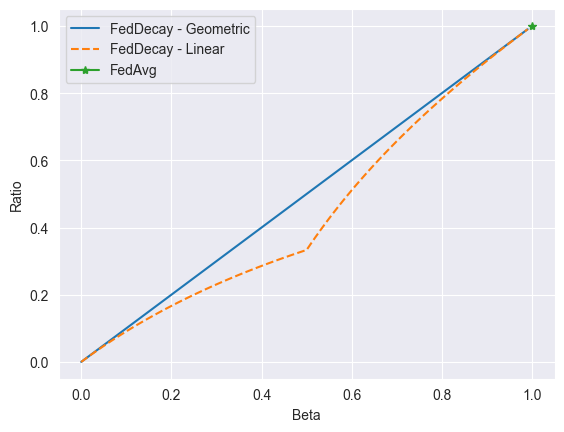

In [57]:
# plot
K = 3
ratios = get_ratio(betas, K)
plt.plot([0] + betas, [0] + ratios, label='FedDecay - Geometric')
ratios = get_linear(1 - np.array(betas), K)
plt.plot([0] + betas, [0] + ratios, label='FedDecay - Linear', linestyle='dashed')
#    plt.semilogy([0] + betas, [0] + ratios, label=f'FedDecay - Linear, K = {K}')
plt.plot([1], [(K - 1)/2], label=f'FedAvg', marker="*")

plt.ylabel('Ratio')
plt.xlabel('Beta')
plt.legend()

plt.savefig('gradient-emphasis.png')
plt.show()

[0.2, 0.4, 0.6, 0.8]


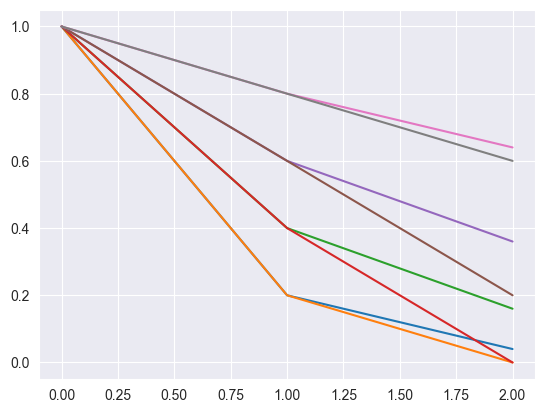

In [63]:
n = 5
K = 3

betas = [
    (i + 1) / n
    for i in range(n - 1)
]
print(betas)
for beta in betas:
    plt.plot(np.arange(K), np.array([beta ** i for i in range(K)]))
    plt.plot(np.arange(K), np.array([max([1 - (1 - beta) * i, 0]) for i in range(K)]))
